In [47]:
import pandas as pd

file_path = 'data/r1_r2_annotations_liwc_h.xlsx'
dfh = pd.read_excel(file_path, engine='openpyxl')


dfh.head()

d:\Library\Downloads\Documents\School\SUPSI_23-24\hackathon_2\project\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,text,proc_text,A1,A2,A3,A4,A5,A6,majority_vote,roundID,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Fuck you china. I was 2 years clear of severe ...,Fuck you china. I was 2 years clear of severe ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,26.92,7.69,3.85,0.0,0.00,3.85,11.54,0.0
1,Feeling so off today and I can’t tell if this ...,Feeling so off today and I can’t tell if this ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,28.00,12.00,0.00,0.0,0.00,8.00,8.00,16.0
2,Good lord people we need to stop having people...,Good lord people we need to stop having people...,PP,UN,PP,PO,PP,PP,PP,Round1,...,0.0,0.00,19.05,4.76,0.00,0.0,0.00,4.76,9.52,0.0
3,"I'm telling yall, Chill the fuck out!! This Vi...","I'm telling yall, Chill the fuck out!! This Vi...",PO,PO,PO,PO,PO,PP,PO,Round1,...,0.0,0.00,37.21,4.65,2.33,0.0,23.26,2.33,4.65,0.0
4,Episode of #CoronaVirus panic. Man took his gl...,Episode of #CoronaVirus panic. Man took his gl...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,1.72,20.69,10.34,5.17,0.0,0.00,3.45,1.72,0.0


In [48]:
print(dfh.columns.values)

['text' 'proc_text' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'majority_vote'
 'roundID' 'Segment' 'WC' 'Analytic' 'Clout' 'Authentic' 'Tone' 'WPS'
 'BigWords' 'Dic' 'Linguistic' 'function' 'pronoun' 'ppron' 'i' 'we' 'you'
 'shehe' 'they' 'ipron' 'det' 'article' 'number' 'prep' 'auxverb' 'adverb'
 'conj' 'negate' 'verb' 'adj' 'quantity' 'Drives' 'affiliation' 'achieve'
 'power' 'Cognition' 'allnone' 'cogproc' 'insight' 'cause' 'discrep'
 'tentat' 'certitude' 'differ' 'memory' 'Affect' 'tone_pos' 'tone_neg'
 'emotion' 'emo_pos' 'emo_neg' 'emo_anx' 'emo_anger' 'emo_sad' 'swear'
 'Social' 'socbehav' 'prosocial' 'polite' 'conflict' 'moral' 'comm'
 'socrefs' 'family' 'friend' 'female' 'male' 'Culture' 'politic'
 'ethnicity' 'tech' 'Lifestyle' 'leisure' 'home' 'work' 'money' 'relig'
 'Physical' 'health' 'illness' 'wellness' 'mental' 'substances' 'sexual'
 'food' 'death' 'need' 'want' 'acquire' 'lack' 'fulfill' 'fatigue'
 'reward' 'risk' 'curiosity' 'allure' 'Perception' 'attention' 'motion'
 'space' 'vi

In [49]:
dfh.drop(['A1','A2','A3','A4','A5','A6'],inplace=True,axis=1)

In [50]:
dfh = dfh[dfh['majority_vote'] != "NoMajority"]
dfh.reset_index(drop=True, inplace=True)
print(dfh.majority_vote.value_counts())
dfh.columns.values

majority_vote
PO    160
UN     98
PP     95
Name: count, dtype: int64


array(['text', 'proc_text', 'majority_vote', 'roundID', 'Segment', 'WC',
       'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic',
       'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you',
       'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity',
       'Drives', 'affiliation', 'achieve', 'power', 'Cognition',
       'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg',
       'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad',
       'swear', 'Social', 'socbehav', 'prosocial', 'polite', 'conflict',
       'moral', 'comm', 'socrefs', 'family', 'friend', 'female', 'male',
       'Culture', 'politic', 'ethnicity', 'tech', 'Lifestyle', 'leisure',
       'home', 'work', 'money', 'relig', 'Physical', 'health', 'illness',
       'wellness', 'mental', 'substances', 'sexual', 'food', 

In [51]:
target = dfh['majority_vote']
dfh.drop(['majority_vote'],inplace=True,axis=1)

## vectorizing

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(dfh["proc_text"], target, test_size=0.2, random_state=42)

# Vectorizing the tweets
# vectorizer = CountVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generating TF-IDF vectors for visualization
texts = dfh['proc_text'].values
tfidf_matrix = X_train_counts

# Converting TF-IDF matrix to dense format and getting feature names
tfidf_dense = tfidf_matrix.todense()
feature_names = vectorizer.get_feature_names_out()

# Creating a DataFrame for easier manipulation
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

In [54]:
# Summarizing the TF-IDF scores for each word across all documents to rank them
word_tfidf_sum = df_tfidf.sum().sort_values(ascending=False)

print(word_tfidf_sum.head(20))

coronavirus    13.011386
panic          12.825192
covid19        10.503754
amp             8.478384
people          6.803599
attacks         5.860307
attack          5.231702
anxiety         5.030002
just            4.981243
having          4.093204
time            3.802178
stay            3.781728
covid_19        3.779082
need            3.723927
don             3.669231
pandemic        3.646436
fear            3.590636
like            3.508335
covid           3.471495
depression      3.381855
dtype: float64


In [55]:
# heatmap
# plt.figure(figsize=(12, 12))
# sns.heatmap(df_tfidf.iloc[:, :40], cmap='YlGnBu')
# plt.title('TF-IDF Scores Heatmap for Top 30 Words in All Documents')
# plt.xlabel('Top 30 Words')
# plt.ylabel('Documents')
# plt.show()

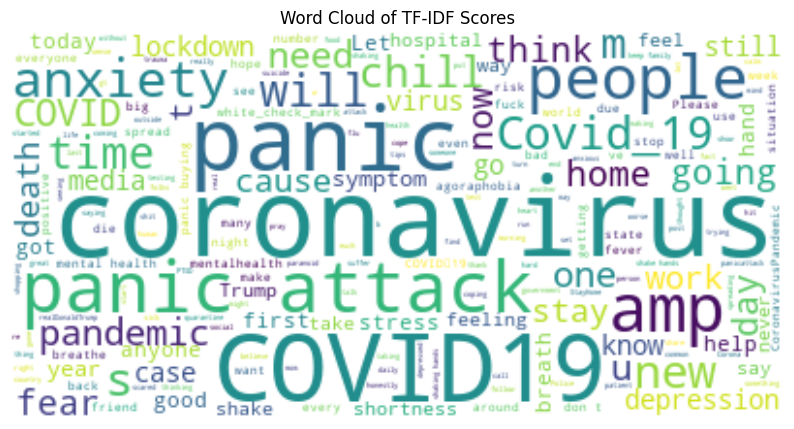

In [56]:
# word cloud
combined_texts = ' '.join(texts)
wordcloud = WordCloud(background_color='white', max_words=200).generate(combined_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores')
plt.show()

## predicting

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_counts, y_train)

y_pred = model.predict(X_test_counts)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

['PO' 'PO' 'UN' 'PO' 'PO' 'PO' 'PP' 'PO' 'PO' 'PP' 'PO' 'PO' 'PP' 'PO'
 'PP' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PP' 'PP' 'PP' 'PO'
 'PO' 'PO' 'PP' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PO' 'PP' 'PO' 'PO' 'PO'
 'PO' 'PO' 'PO' 'PO' 'PP' 'PO' 'PP' 'UN' 'PO' 'PO' 'PO' 'PO' 'UN' 'PO'
 'PO' 'PP' 'PO' 'PO' 'PO' 'PO' 'PO' 'PP' 'PP' 'PO' 'PO' 'PO' 'UN' 'PO'
 'PO']
Model Accuracy: 0.5774647887323944
